# New York City Taxi Fare Prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers.

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction


## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas



Dataset link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview



### Install Required Libraries

In [2]:
!pip install numpy pandas opendatasets scikit-learn xgboost scikit-optimize --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.6 MB/s eta 0:00:00



Here's an outline of the project:

1. Download the dataset
2. Explore & analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Peform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with the entire dataset
10. Document & publish the project online


### Download Data from Kaggle

We'll use the opendatasets library: https://github.com/JovianML/opendatasets

In [36]:
import opendatasets as od

In [37]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [38]:
%%time
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [00:26<00:00, 62.6MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction
CPU times: user 48.9 s, sys: 19.6 s, total: 1min 8s
Wall time: 1min 52s


In [34]:
data_dir = './new-york-city-taxi-fare-prediction'

### View Dataset Files

In [6]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Jul 26 05:07 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Jul 26 05:07 sample_submission.csv
-rw-r--r-- 1 root root 960K Jul 26 05:07 test.csv
-rw-r--r-- 1 root root 5.4G Jul 26 05:08 train.csv


In [7]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [8]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [9]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [10]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [11]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [12]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.



### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [5]:
import pandas as pd
import random

In [14]:
# Change this
sample_frac = 0.01

In [15]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv",
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)

CPU times: user 1min 11s, sys: 1.31 s, total: 1min 12s
Wall time: 1min 38s


In [16]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


### Load Test Set

For the test set, we'll simply provide the data types.

In [17]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [18]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

### Training Set

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [20]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934257,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255058,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [21]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0
- `passenger_count` ranges from 0 to 208
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.


### Test Set

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [23]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [24]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

### Exploratory Data Analysis and Visualization

In this section, we will be creating graphs (histograms, line charts, bar charts, scatter plots, box plots, geo maps etc.) to study the distrubtion of values in each column, and the relationship of each input column to the target.



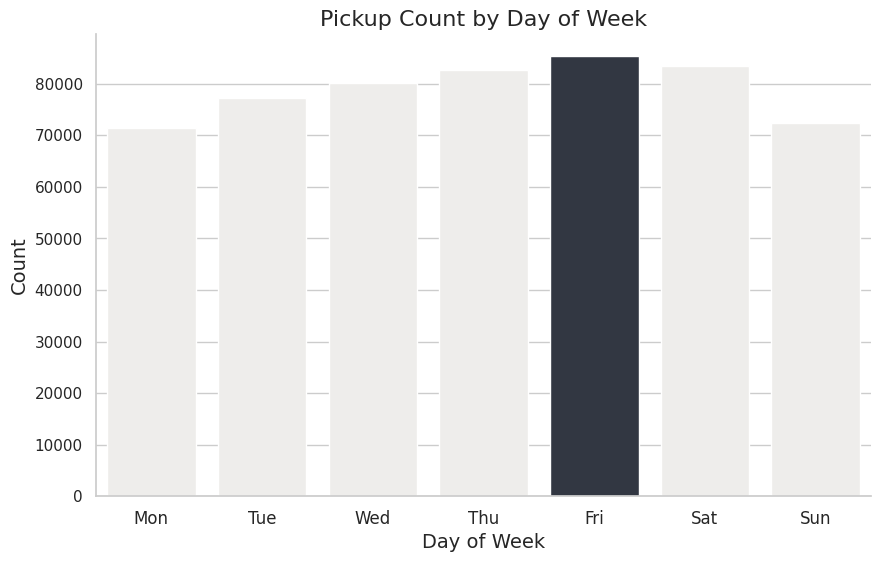

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df['day_of_week'] = df.pickup_datetime.dt.dayofweek
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_counts = df['day_of_week'].value_counts().reindex(range(7), fill_value=0)

max_count_day = day_counts.idxmax()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Adding a white grid background


# Using custom colors to highlight the maximum and set others to grey
colors = ['#EEEDEB' if (day != max_count_day) else '#2F3645' for day in day_counts.index]

# Using a color palette
ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette=colors, hue=day_counts.index, legend = False)

# Adding labels and title
plt.title('Pickup Count by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customizing x-axis labels to show day names
plt.xticks(range(7), days_of_week, fontsize=12)

# Removing top and right spines
sns.despine()

# Show plot
plt.show()


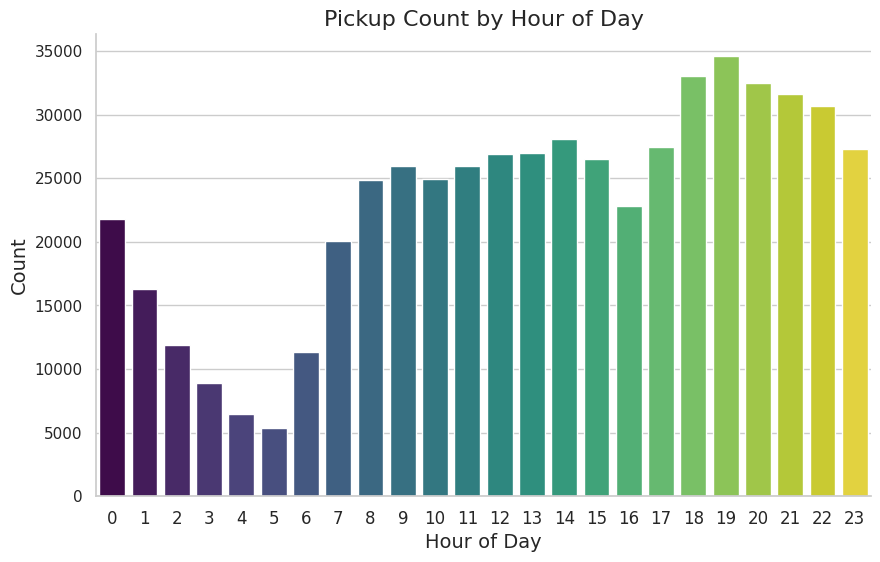

The busiest hour of the day is 19:00


In [26]:
# prompt: What is the busiest time of the day?

# Extract hour from pickup datetime
df['hour'] = df.pickup_datetime.dt.hour

# Count pickups for each hour
hourly_counts = df['hour'].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_counts.idxmax()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Adding a white grid background

# Using a color palette
ax = sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis", legend = False, hue = hourly_counts.index)

# Adding labels and title
plt.title('Pickup Count by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customizing x-axis labels to show day names
plt.xticks(range(24), fontsize=12)

# Removing top and right spines
sns.despine()

# Show plot
plt.show()

print(f"The busiest hour of the day is {busiest_hour}:00")


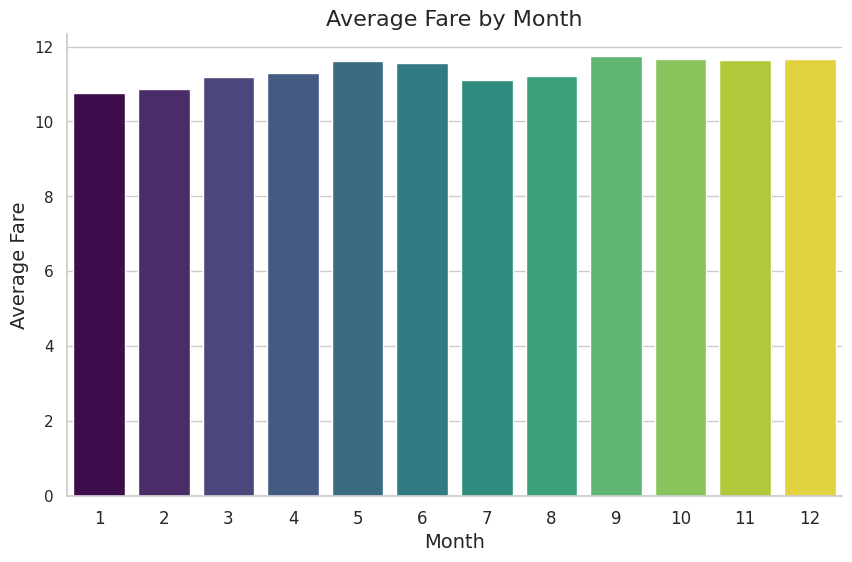

The month with the highest average fare is 9


In [27]:
# prompt: In which month are fares the highest?

df['month'] = df.pickup_datetime.dt.month
month_fares = df.groupby('month')['fare_amount'].mean()

# Find the month with the highest average fare
highest_fare_month = month_fares.idxmax()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Adding a white grid background

# Using a color palette
ax = sns.barplot(x=month_fares.index, y=month_fares.values, palette="viridis", legend = False, hue = month_fares.index)

# Adding labels and title
plt.title('Average Fare by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)

# Customizing x-axis labels to show day names
plt.xticks(range(12), fontsize=12)

# Removing top and right spines
sns.despine()

# Show plot
plt.show()

print(f"The month with the highest average fare is {highest_fare_month}")


In [28]:
# prompt: Which pickup locations have the highest fares?

# Calculate average fare for each pickup location (rounded to 2 decimal places)
avg_fares_by_location = df.groupby(['pickup_latitude', 'pickup_longitude'])['fare_amount'].mean().round(2)

# Sort by average fare in descending order
avg_fares_by_location = avg_fares_by_location.sort_values(ascending=False)

# Print the top 10 pickup locations with the highest average fares
print(avg_fares_by_location.head(10))


pickup_latitude  pickup_longitude
40.749504        -73.979179          499.000000
40.753597        -73.977364          400.000000
40.689346        -73.828026          350.000000
40.740963        -73.866432          300.000000
40.687523        -73.808014          264.799988
40.647446        -73.789673          258.000000
40.695320        -73.681183          250.000000
41.118507        -73.383537          245.000000
40.717747        -73.831535          228.500000
41.420742        -73.389191          217.330002
Name: fare_amount, dtype: float32


In [29]:
# prompt: Which drop locations have the highest fares?

# Calculate average fare for each dropoff location (rounded to 2 decimal places)
avg_fares_by_dropoff = df.groupby(['dropoff_latitude', 'dropoff_longitude'])['fare_amount'].mean().round(2)

# Sort by average fare in descending order
avg_fares_by_dropoff = avg_fares_by_dropoff.sort_values(ascending=False)

# Print the top 10 dropoff locations with the highest average fares
print(avg_fares_by_dropoff.head(10))


dropoff_latitude  dropoff_longitude
40.749480         -73.979210           499.000000
40.753597         -73.977364           400.000000
40.740963         -73.866432           300.000000
41.238758         -73.372993           264.799988
40.478900         -74.410416           258.000000
40.694261         -73.677238           250.000000
41.118507         -73.383537           245.000000
40.810715         -74.383461           228.500000
41.437692         -73.219963           217.330002
40.799922         -74.481300           212.800003
Name: fare_amount, dtype: float32


In [30]:
# prompt: The average ride distance?

import numpy as np

# Define a function to calculate distance using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine distance between two points on the Earth.

    Args:
        lat1: Latitude of the first point.
        lon1: Longitude of the first point.
        lat2: Latitude of the second point.
        lon2: Longitude of the second point.

    Returns:
        The Haversine distance in kilometers.
    """
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Earth radius in kilometers
    return km

# Calculate distances for each ride
df['distance_km'] = haversine_distance(df['pickup_latitude'],
                                        df['pickup_longitude'],
                                        df['dropoff_latitude'],
                                        df['dropoff_longitude'])

# Calculate the average ride distance
average_distance = df['distance_km'].mean()

print(f"The average ride distance is approximately {average_distance:.2f} kilometers.")


The average ride distance is approximately 20.19 kilometers.


**Observations**: Ask & answer questions about the dataset:

1. The busiest day of the week for pickups is **Friday**.
2. The peak pickup time occurs around **18:00**.
3. Across all months, the fare amount remains relatively consistent; however, **September** stands out with the highest fare amount.
4. The average travel distance per trip is approximately **20.19 kilometers**.



## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [33]:
len(train_df), len(val_df)

(441960, 110490)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [34]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [35]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'day_of_week', 'hour', 'month', 'distance_km'],
      dtype='object')

In [36]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [37]:
target_col = 'fare_amount'

#### Training

In [38]:
train_inputs = train_df[input_cols]

In [39]:
train_targets = train_df[target_col]

In [40]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724579,-73.993805,40.724577,1.0
372609,-73.959160,40.780750,-73.969116,40.761231,1.0
550895,-73.952187,40.783951,-73.978645,40.772603,1.0
444151,-73.977112,40.746834,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763167,1.0
259178,-73.972656,40.764042,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


In [41]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

#### Validation

In [42]:
val_inputs = val_df[input_cols]

In [43]:
val_targets = val_df[target_col]

In [44]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1.0
149839,-73.977386,40.738335,-73.976143,40.751204,1.0
515867,-73.983910,40.749470,-73.787170,40.646643,1.0
90307,-73.790794,40.643463,-73.972252,40.690180,1.0
287032,-73.976593,40.761944,-73.991463,40.750309,2.0
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750020,3.0
19482,-73.986725,40.755920,-73.985855,40.731170,1.0
186063,0.000000,0.000000,0.000000,0.000000,1.0
382260,-73.980057,40.760334,-73.872589,40.774298,1.0


In [45]:
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

#### Test

In [46]:
test_inputs = test_df[input_cols]

In [47]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


## 4. Train Hardcoded & Baseline Models

- Hardcoded model: always predict average fare
- Baseline model: Linear regression

For evaluation the dataset uses RMSE error:
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [48]:
import numpy as np

In [49]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [50]:
mean_model = MeanRegressor()

In [51]:
mean_model.fit(train_inputs, train_targets)

In [52]:
mean_model.mean

11.354714

In [53]:
train_preds = mean_model.predict(train_inputs)

In [54]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [55]:
val_preds = mean_model.predict(val_inputs)

In [56]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [59]:
train_rmse

9.789782

In [60]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

In [61]:
val_rmse

9.899954

Our dumb hard-coded model is off by \$9.899 on average, which is pretty bad considering the average fare is \$11.35.

### Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
linreg_model = LinearRegression()

In [64]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [65]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.54623682, 11.28460949, 11.28413941, ..., 11.45891673,
       11.28428005, 11.28444733])

In [66]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.28432795, 11.28449549, 11.28478054, ..., 11.80449938,
       11.28443343, 11.28413233])

In [67]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

9.78863266989743

In [68]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

9.898088220645102

The linear regression model is off by $9.898, which isn't much better than simply predicting the average.

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

To enhance the predictive performance of the model, I plan to explore and compare alternative machine learning algorithms. The current linear regression model yielded an RMSE of 9.79, indicating room for improvement. Here’s the proposed strategy:

1. **Exploration of Alternative Models**:
   - Implement and evaluate ensemble methods such as Random Forest or Gradient Boosting, which are known for handling complex relationships and nonlinearities in data.
   - Additionally, consider Support Vector Machines (SVM) and Neural Networks, which may capture intricate patterns that linear regression might overlook.

2. **Cross-Validation and Hyperparameter Tuning**:
   - Employ cross-validation techniques to assess the generalization performance of each model and mitigate overfitting.
   - Conduct thorough hyperparameter tuning using techniques like Grid Search or Random Search to optimize model parameters for improved accuracy.

3. **Evaluation Criteria**:
   - Assess model performance using metrics beyond RMSE, such as R-squared (coefficient of determination), MAE (Mean Absolute Error), and possibly domain-specific metrics if applicable.
   - Select the model that demonstrates the best balance of accuracy and interpretability for practical deployment.

By systematically evaluating different models and refining their parameters, the goal is to achieve a higher predictive accuracy and robustness compared to the initial linear regression model.

## 5. Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks

Exercise: We're going to apply all of the above together, but you should observer the effect of adding each feature individually.

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour



In [69]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [70]:
add_dateparts(train_df, 'pickup_datetime')

In [71]:
add_dateparts(val_df, 'pickup_datetime')

In [72]:
add_dateparts(test_df, 'pickup_datetime')

In [73]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,distance_km,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,6,3,4,1.324241,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2,19,1,0.000273,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2,10,10,2.326887,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2,13,3,2.560493,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,6,15,2,1.243998,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,6,16,9,1.550989,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,6,9,4,7.120771,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,3,19,7,3.253382,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,3,18,2,2.147419,2011,2,17,3,18


### Add Distance Between Pickup and Drop

We can use the haversine distance:
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [74]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [75]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [76]:
%%time
add_trip_distance(train_df)

CPU times: user 34.8 ms, sys: 11 ms, total: 45.8 ms
Wall time: 47.6 ms


In [77]:
add_trip_distance(val_df)

In [78]:
add_trip_distance(test_df)

In [79]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,distance_km,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
408067,7.000000,2014-03-23 17:47:59+00:00,-73.966240,40.768078,-73.985870,40.771100,1.0,6,17,3,1.686908,2014,3,23,6,17,1.685849
2410,10.900000,2011-05-10 19:45:00+00:00,-73.993706,40.757908,-73.987991,40.727868,2.0,1,19,5,3.374769,2011,5,10,1,19,3.372650
473650,3.300000,2010-08-19 08:51:51+00:00,0.000000,0.000000,0.000000,0.000000,1.0,3,8,8,0.000000,2010,8,19,3,8,0.000000
258248,8.500000,2013-03-27 10:44:00+00:00,-74.004616,40.737560,-73.987541,40.744702,4.0,2,10,3,1.643219,2013,3,27,2,10,1.642187
238727,17.700001,2010-10-29 00:18:00+00:00,-74.013626,40.704433,-73.953362,40.771400,1.0,4,0,10,9.012566,2010,10,29,4,0,9.006908


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location.

In [80]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [81]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])


In [82]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 241 ms, sys: 13.6 ms, total: 254 ms
Wall time: 283 ms


In [83]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,...,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
193692,7.3,2009-02-10 08:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1.0,1,8,2,...,2,10,1,8,0.000000,8641.281264,8652.020187,8675.110080,8659.448270,8661.945344
371473,8.1,2009-02-15 15:52:00+00:00,-73.989899,40.738361,-73.983582,40.760677,2.0,6,15,2,...,2,15,6,15,2.536442,21.809370,9.396611,17.919021,2.696120,5.784095
14082,13.3,2011-01-19 16:35:00+00:00,-74.005547,40.750858,-73.989090,40.722150,1.0,2,16,1,...,1,19,2,16,3.478094,19.921443,11.440637,16.035074,6.724796,2.049098
176249,8.9,2009-05-15 22:41:05+00:00,-73.991394,40.744587,-73.977036,40.724089,1.0,4,22,5,...,5,15,4,22,2.578584,19.122747,10.472570,17.072808,6.255751,3.048430
513456,19.0,2013-10-05 10:14:36+00:00,-74.009483,40.747883,-73.970963,40.788368,1.0,5,10,10,...,10,5,5,10,5.545287,23.043072,8.257566,20.357050,1.191378,9.035335


### Remove Outliers and Invalid Data

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [84]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,distance_km,...,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,...,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937865,1.684444,3.035813,13.506568,6.263920,19.764173,...,6.263920,15.732492,3.035813,13.506568,19.751764,193.147978,182.365206,191.412330,177.416092,178.902096
std,9.789793,11.795325,8.464263,12.398610,9.857420,1.344170,1.950033,6.517710,3.434881,371.532570,...,3.434881,8.697374,1.950033,6.517710,371.299305,1223.614787,1226.672207,1228.515208,1228.388658,1228.487258
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.305535,0.116385,0.129259,0.031095,0.009334
25%,6.000000,-73.992027,40.734859,-73.991409,40.733968,1.000000,1.000000,9.000000,3.000000,1.213212,...,3.000000,8.000000,1.000000,9.000000,1.212450,20.535191,8.350965,16.502844,2.169888,3.642498
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,3.000000,14.000000,6.000000,2.117559,...,6.000000,16.000000,3.000000,14.000000,2.116230,21.202076,9.575570,18.016353,3.818017,5.559662
75%,12.500000,-73.967186,40.767006,-73.963715,40.768045,2.000000,5.000000,19.000000,9.000000,3.882110,...,9.000000,23.000000,5.000000,19.000000,3.879673,21.948262,11.122069,19.953306,6.071750,7.814534
max,400.000000,2420.209473,404.899994,2467.752686,3351.403027,208.000000,6.000000,23.000000,12.000000,16924.070526,...,12.000000,31.000000,6.000000,23.000000,16913.444834,15057.674834,15074.642961,15074.714623,15077.613474,15072.109731


In [85]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217,20.916707,9.675209,18.546655,4.512975,6.037621
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303942,3.295656,4.035818,4.018438,4.252537
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009,0.402057,0.285510,0.284706,0.085728,0.040386
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281,20.513366,8.311562,16.520468,2.126326,3.669914
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669,21.181394,9.477792,18.024364,3.698360,5.541418
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928,21.909781,10.965471,19.880521,5.922760,7.757408
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359,134.497657,126.062486,149.400789,130.347048,138.619454


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6


In [86]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [87]:
train_df = remove_outliers(train_df)

In [88]:
val_df = remove_outliers(val_df)

In [89]:
# prompt: Create a function to find out whether it is holiday in US or not, and add a new column to the dataset, which is 1 if the row is on a holiday, or else, 0.

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import holidays

def add_holiday(df):
  cal = calendar()
  us_holidays = holidays.US()

  df["holiday"] = pd.to_numeric(df.apply(lambda x: 1 if x.pickup_datetime.strftime('%d-%m-%y')in us_holidays else 0, axis =1), downcast = "unsigned")

In [90]:
add_holiday(train_df)

<ipython-input-89-66c8d0217c3b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["holiday"] = pd.to_numeric(df.apply(lambda x: 1 if x.pickup_datetime.strftime('%d-%m-%y')in us_holidays else 0, axis =1), downcast = "unsigned")


In [91]:
add_holiday(val_df)
add_holiday(test_df)

In [92]:
print(train_df["holiday"].value_counts())
print(val_df["holiday"].value_counts())
print(test_df["holiday"].value_counts())

holiday
0    419888
1     11210
Name: count, dtype: int64
holiday
0    104959
1      2783
Name: count, dtype: int64
holiday
0    9749
1     165
Name: count, dtype: int64


### Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.

You may also want to create differnt notebooks for EDA, feature engineering and model training.


In [93]:
train_df.to_parquet('train.parquet')

In [94]:
val_df.to_parquet('val.parquet')

In [95]:
test_df.to_parquet('test.parquet')

## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting

Exercise: Train Ridge, SVM, KNN, Decision Tree models

### Split Inputs & Targets

In [15]:
train_df = pd.read_parquet("/content/train.parquet")
val_df = pd.read_parquet("/content/val.parquet")
test_df = pd.read_parquet("/content/test.parquet")

In [16]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'day_of_week', 'hour', 'month', 'distance_km', 'pickup_datetime_year',
       'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance', 'holiday'],
      dtype='object')

In [17]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance', 'holiday']

In [18]:
target_col = 'fare_amount'

In [19]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [20]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [21]:
test_inputs = test_df[input_cols]

Let's define a helper function to evaluate models and generate test predictions

In [30]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [31]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

### Ridge Regression

In [104]:
from sklearn.linear_model import Ridge

In [105]:
model1 = Ridge(random_state=42)

In [106]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: user 95.9 ms, sys: 55.7 ms, total: 152 ms
Wall time: 152 ms


Ridge(random_state=42)

In [107]:
evaluate(model1)

(5.048957873480803,
 5.217381084587798,
 array([ 8.13304521,  4.12826532,  8.76406651, ..., 10.48211071,
         8.24152909, 10.60033365]),
 array([10.93362441,  6.2118013 , 46.22156389, ...,  8.06381255,
        25.58220308,  8.45861105]))

Our model was able to get to an RMSE of $5.2, much better than our baseline model.

In [108]:
predict_and_submit(model1, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.095539
1,2015-01-27 13:08:24.0000003,11.413402
2,2011-10-08 11:53:44.0000002,5.361826
3,2012-12-01 21:12:12.0000002,8.768756
4,2012-12-01 21:12:12.0000003,14.615059
...,...,...
9909,2015-05-10 12:37:51.0000002,9.028807
9910,2015-01-12 17:05:51.0000001,11.238464
9911,2015-04-19 20:44:15.0000001,47.928856
9912,2015-01-31 01:05:19.0000005,22.604860


### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [25]:
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

In [119]:
rf = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [120]:
%%time
rf.fit(train_inputs, train_targets)

CPU times: user 4min 59s, sys: 766 ms, total: 4min 59s
Wall time: 5min 31s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [122]:
import joblib

joblib.dump(rf, 'random_forest_regressor_V1.pkl')

['random_forest_regressor_V1.pkl']

In [123]:
rf = joblib.load('random_forest_regressor_V1.pkl')

In [124]:
evaluate(rf)

(3.597768758466327,
 4.162879088855115,
 array([ 7.04561969,  9.16841263,  9.10837664, ..., 10.38572951,
         7.74169069, 10.38922928]),
 array([12.53333721,  6.14758144, 47.32745299, ...,  8.33103424,
        29.15652571,  8.2638333 ]))

In [125]:
predict_and_submit(rf, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.507307
1,2015-01-27 13:08:24.0000003,10.507307
2,2011-10-08 11:53:44.0000002,5.052405
3,2012-12-01 21:12:12.0000002,8.466582
4,2012-12-01 21:12:12.0000003,14.344346
...,...,...
9909,2015-05-10 12:37:51.0000002,8.835443
9910,2015-01-12 17:05:51.0000001,12.520002
9911,2015-04-19 20:44:15.0000001,55.266349
9912,2015-01-31 01:05:19.0000005,21.551546


### Gradient Boosting

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [7]:
from xgboost import XGBRegressor

In [127]:
xgb = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [128]:
%%time
xgb.fit(train_inputs, train_targets)

CPU times: user 15 s, sys: 80.9 ms, total: 15.1 s
Wall time: 16.7 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [129]:
joblib.dump(xgb, 'xgb_V1.pkl')

['xgb_V1.pkl']

In [130]:
evaluate(xgb)

(3.1115522,
 4.0047207,
 array([ 6.2697697,  8.175203 , 10.25587  , ..., 12.17098  ,  9.687094 ,
        10.053421 ], dtype=float32),
 array([14.836897,  5.70551 , 48.371555, ...,  7.949998, 30.11596 ,
         8.713349], dtype=float32))

In [131]:
predict_and_submit(xgb, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.582130
1,2015-01-27 13:08:24.0000003,11.461053
2,2011-10-08 11:53:44.0000002,4.829461
3,2012-12-01 21:12:12.0000002,8.391849
4,2012-12-01 21:12:12.0000003,15.927152
...,...,...
9909,2015-05-10 12:37:51.0000002,8.670965
9910,2015-01-12 17:05:51.0000001,11.346496
9911,2015-04-19 20:44:15.0000001,53.838833
9912,2015-01-31 01:05:19.0000005,20.226091


## 8. Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [132]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [133]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

### No. of Trees

CPU times: user 1min 49s, sys: 305 ms, total: 1min 50s
Wall time: 1min 33s


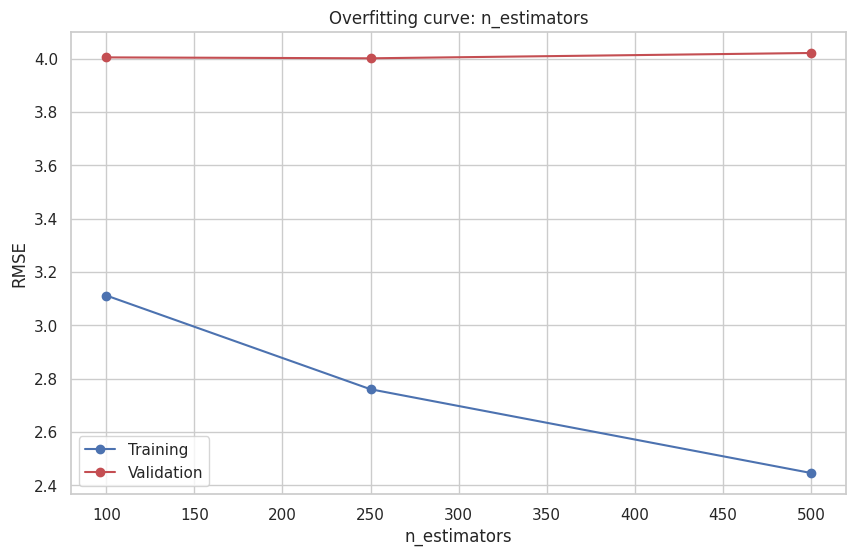

In [134]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

In [135]:
best_params['n_estimators'] = 250

### Max Depth

CPU times: user 1min 22s, sys: 188 ms, total: 1min 22s
Wall time: 1min 10s


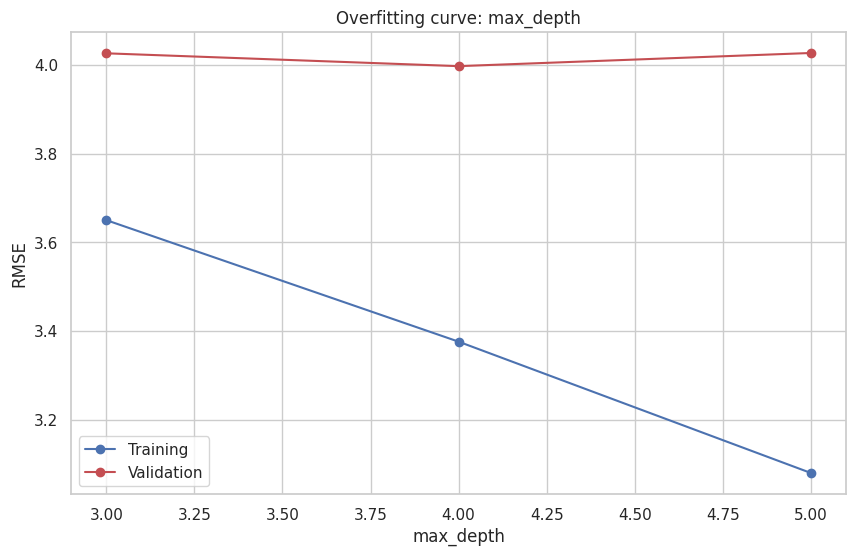

In [136]:
%%time
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

Looks like a max depth of 5 is ideal.

In [137]:
best_params['max_depth'] = 5

### Learning Rate

CPU times: user 1min 9s, sys: 185 ms, total: 1min 9s
Wall time: 53 s


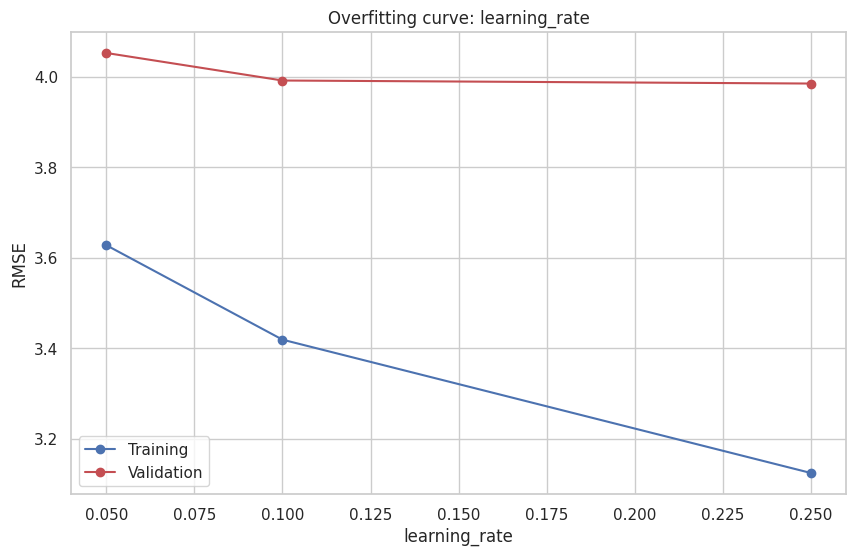

In [138]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

Seems like the best learning rate is 0.25.

In [139]:
best_params['learning_rate'] = 0.25

### Other Parameters

Similarly we can experiment with other parameters.

**Hyperparameter Tuning Strategy**

We have already optimized the following key hyperparameters for the XGBRegressor:

Learning Rate
Max Depth
Number of Estimators
These parameters were tuned by evaluating RMSE and plotting to identify the best values.

**Next Steps: Bayesian Optimization**

To further refine our model, we plan to use Bayesian optimization to fine-tune additional hyperparameters. Specifically, we will focus on optimizing:

Gamma: Regularization term that controls the complexity of the model.
Min Child Weight: Minimum sum of instance weight (hessian) needed in a child.
Subsample: Fraction of samples used for each tree.
Colsample Bytree: Fraction of features used for each tree.

In [55]:
xgb_1 = XGBRegressor(
    n_estimators=500,  # Fixed value
    learning_rate=0.1,  # Fixed value
    max_depth=5,  # Fixed value
    random_state=42,
    eval_metric='rmse', # Ensure 'eval_metric' is set for evaluation during training
    objective='reg:squarederror'

)

# Define the parameter distribution for Bayesian optimization wqeqe
param_distribution = {
    'gamma': Real(0, 1, 'uniform'),
    'subsample': Real(0.8, 1.0, 'uniform'),
    'colsample_bytree': Real(0.5, 0.8, 'uniform')
}

scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
xgb_bs = BayesSearchCV(estimator=xgb_1, search_spaces=param_distribution,
                             scoring=scorer,
                             cv=5, n_iter=20, random_state=42, verbose=1, n_jobs=-1)

In [56]:
%%time
xgb_bs.fit(train_inputs, train_targets)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='rmse', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1...
                                     random_state=42, ...),
              n_iter=20, n_jobs=-1, random_state=42,
              scoring=make_scorer(<lambda>, greater_is_better=False),
              search_spaces={'colsample_bytree': Real(low=0.5, high=0.8, prior='uniform', transform='normalize'),
                             'gamma': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.8, high=1.0, prior='uniform', transform='normalize')},
              verbose=1)

In [57]:
import joblib
best_xgb_model = xgb_bs.best_estimator_
joblib.dump(best_xgb_model, 'xgb_bs_V3.pkl')

['xgb_bs_V3.pkl']

In [60]:
xgb_bs = joblib.load('xgb_bs_V3.pkl')

In [61]:
evaluate(xgb_bs)

(3.215934,
 3.948092,
 array([ 6.6952972,  7.623833 ,  9.558338 , ..., 11.8892145,  9.27312  ,
         9.951185 ], dtype=float32),
 array([14.937125,  5.705965, 48.437027, ...,  7.6714  , 30.63996 ,
         8.66336 ], dtype=float32))

In [62]:
predict_and_submit(xgb_bs, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.042372
1,2015-01-27 13:08:24.0000003,10.851355
2,2011-10-08 11:53:44.0000002,4.745337
3,2012-12-01 21:12:12.0000002,8.751855
4,2012-12-01 21:12:12.0000003,15.921391
...,...,...
9909,2015-05-10 12:37:51.0000002,8.937592
9910,2015-01-12 17:05:51.0000001,11.851549
9911,2015-04-19 20:44:15.0000001,54.231026
9912,2015-01-31 01:05:19.0000005,19.924494


<Axes: xlabel='X'>

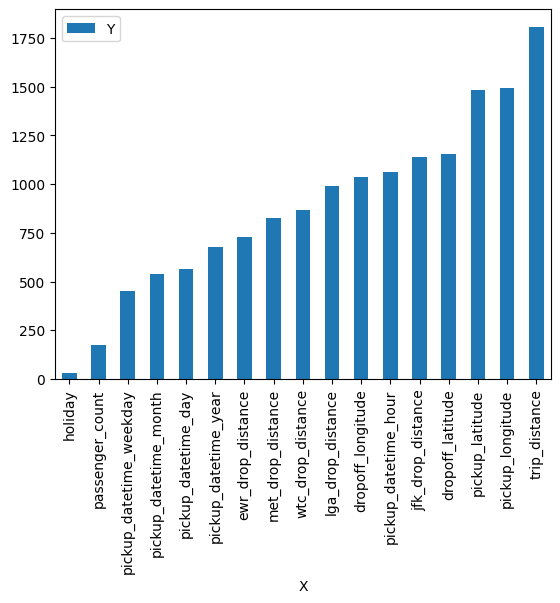

In [67]:
booster = xgb_bs.get_booster()
importance = booster.get_score(importance_type='weight')
fscores = pd.DataFrame({'X': list(importance.keys()), 'Y': list(importance.values())})
fscores.sort_values(by='Y').plot.bar(x='X')

# **Project Summary**:

The goal of this project was to develop a predictive model for predicting taxi fares. Using the XGBoost Regressor and Bayesian optimization for hyperparameter tuning, the model achieved an RMSE of 3.215, demonstrating effective performance. Analysis of feature importance revealed that trip_distance is the most influential feature, significantly impacting the model's predictions.

**Conclusion**:

The model’s performance is promising, with trip_distance identified as a key predictor. This insight highlights the importance of trip distance in predicting fare_amount, providing valuable guidance for future work.

Future Plans:

1. Model Improvement: Explore additional features and advanced techniques to enhance accuracy.
2. Data Collection: Gather more data and ensure its quality.
3. Feature Engineering: Analyze and select features to improve the model.
4. Model Deployment: Consider real-world deployment and monitoring.
5. Exploratory Data Analysis: Conduct further EDA for deeper insights.